# Introduction to Data Analysis


---
Topics

*   Initial Exploration
*   Cleaning & Filtering
*   Basic Aggregations
*   Visual Exploration






In [71]:
#Package used for data exploration
import pandas as pd

In [72]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019 (2).csv


**Initial Exploration**

In [73]:
#Loading in the data set and storing it as df variable
df = pd.read_csv("AB_NYC_2019.csv")

In [74]:
#Show the first 5 records
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [75]:
#Number of rows and columns
df.shape

(48895, 16)

In [76]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [77]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Cleaning & Filtering**

In [78]:
#Number of missing values from each column
df.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [79]:
#Fill all null reviews per month column with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [80]:
# Only show listings $500 and under
df = df[df['price'] <= 500]

In [81]:
#Only show listings with max 1 year stay
df = df[df['minimum_nights'] <= 365]

In [82]:
#Convert from float value to date and time value for better analysis
df['last_review'] = pd.to_datetime(df['last_review'])

In [83]:
df.dtypes


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [84]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 47837 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              47837 non-null  int64         
 1   name                            47822 non-null  object        
 2   host_id                         47837 non-null  int64         
 3   host_name                       47816 non-null  object        
 4   neighbourhood_group             47837 non-null  object        
 5   neighbourhood                   47837 non-null  object        
 6   latitude                        47837 non-null  float64       
 7   longitude                       47837 non-null  float64       
 8   room_type                       47837 non-null  object        
 9   price                           47837 non-null  int64         
 10  minimum_nights                  47837 non-null  int64         
 11  number_

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.783700e+04,4.783700e+04,47837.000000,47837.000000,47837.000000,47837.000000,47837.000000,38215,47837.000000,47837.000000,47837.000000
mean,1.898323e+07,6.717046e+07,40.728814,-73.951654,131.528796,6.787863,23.551958,2018-10-04 02:02:12.073793024,1.100458,7.078161,111.154148
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.461803e+06,7.772526e+06,40.689830,-73.982670,68.000000,1.000000,1.000000,2018-07-08 00:00:00,0.040000,1.000000,0.000000
50%,1.962520e+07,3.059007e+07,40.722630,-73.955210,100.000000,2.000000,5.000000,2019-05-19 00:00:00,0.380000,1.000000,43.000000
75%,2.907412e+07,1.072729e+08,40.763250,-73.935570,172.000000,5.000000,24.000000,2019-06-23 00:00:00,1.610000,2.000000,221.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,500.000000,365.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.096436e+07,7.829300e+07,0.054777,0.046245,88.061671,16.195529,44.826187,NaN,1.604595,32.764248,130.944586


**Basic Aggregations**

In [85]:
#Average price by borough
df.groupby("neighbourhood_group")["price"].mean()

,price
neighbourhood_group,
Bronx,81.742620
Brooklyn,112.638130
Manhattan,163.241548
Queens,92.824667
Staten Island,91.144414


In [86]:
#Summary stats for each borough
df.groupby("neighbourhood_group")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1084.0,81.742620,60.770896,0.0,45.0,65.0,99.0,500.0
Brooklyn,19869.0,112.638130,75.641215,0.0,60.0,90.0,148.0,500.0
Manhattan,20882.0,163.241548,95.113180,0.0,92.0,145.0,200.0,500.0
Queens,5635.0,92.824667,64.046762,10.0,50.0,75.0,110.0,500.0
Staten Island,367.0,91.144414,63.075143,13.0,50.0,75.0,105.5,450.0


In [87]:
#Neighbourhoods with the highest and lowest priced listings
df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)

,price
neighbourhood,
Neponsit,274.666667
Tribeca,269.157534
NoHo,258.178082
Willowbrook,249.000000
Flatiron District,233.898551
...,...
New Dorp,57.000000
Soundview,53.466667
Tremont,51.545455


In [88]:
#Listings with the highest price
df.nlargest(5, "price")[["name", "neighbourhood_group", "neighbourhood", "room_type", "price"]]

,name,neighbourhood_group,neighbourhood,room_type,price
103,2000 SF 3br 2bath West Village private townhouse,Manhattan,West Village,Entire home/apt,500
233,"Beautiful, elegant 3 bed SOHO loft",Manhattan,SoHo,Entire home/apt,500
242,Huge Chelsea Loft,Manhattan,Chelsea,Entire home/apt,500
304,Great Large 3 BR/2 Bath Duplex with Private Pa...,Manhattan,East Village,Entire home/apt,500
467,Amazing Brownstone in Best Brooklyn,Brooklyn,Carroll Gardens,Entire home/apt,500


In [89]:
#Listings with the lowest price
df[df["price"] > 0].nsmallest(5, "price")[["name", "neighbourhood_group", "neighbourhood", "room_type", "price"]]

,name,neighbourhood_group,neighbourhood,room_type,price
2860,Large furnished 2 bedrooms- - 30 days Minimum,Manhattan,East Village,Entire home/apt,10
21700,Couch in Harlem Harvey Refugees only,Manhattan,Harlem,Shared room,10
22261,"Newly renovated, fully furnished room in Brooklyn",Brooklyn,Bushwick,Private room,10
22287,Jen Apt,Manhattan,SoHo,Private room,10
22835,IT'S SIMPLY CONVENIENT!,Queens,Jamaica,Entire home/apt,10


In [90]:
#Number of listings per type
df["room_type"].value_counts()

,count
room_type,
Entire home/apt,24507
Private room,22179
Shared room,1151


**Visual Exploration**

In [91]:
import matplotlib.pyplot as plt

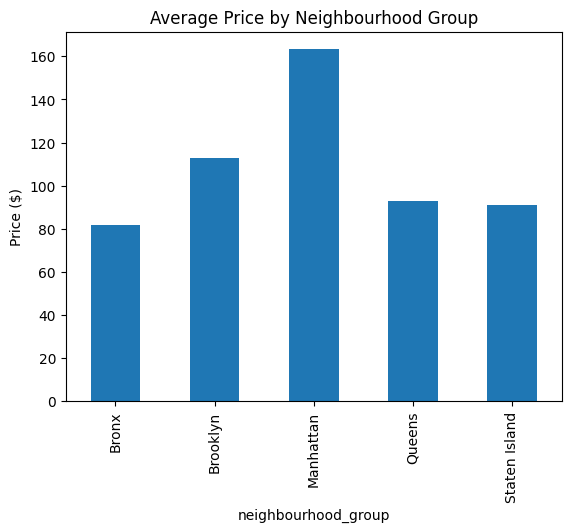

In [92]:
#Bar Chart of Average price by neighbourhood group
df.groupby("neighbourhood_group")["price"].mean().plot(kind='bar')
plt.title("Average Price by Neighbourhood Group")
plt.ylabel("Price ($)")
plt.show()

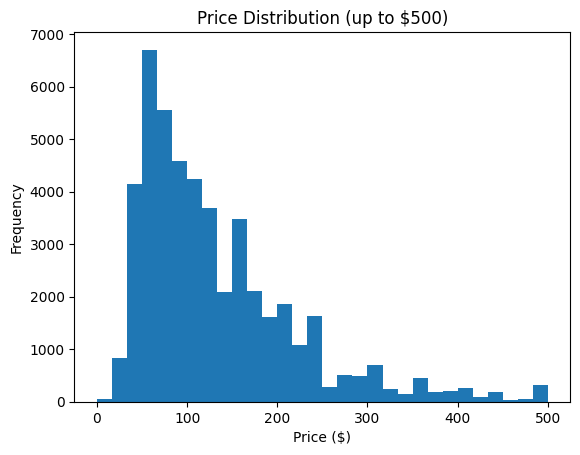

In [93]:
# Histogram of Price distrubution (up to $500)
df[df['price'] <= 500]['price'].plot(kind='hist', bins=30)
plt.title("Price Distribution (up to $500)")
plt.xlabel("Price ($)")
plt.show()

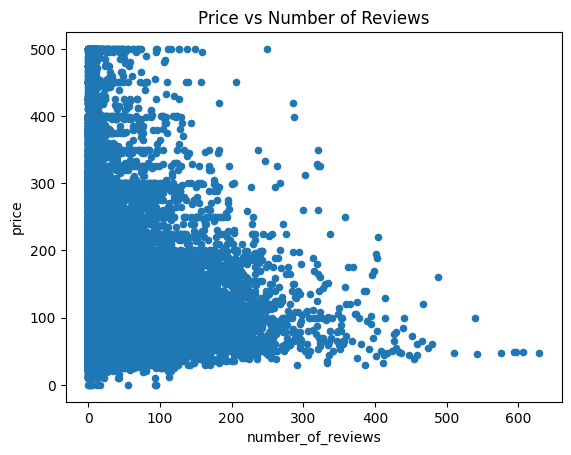

In [94]:
#Scatterplot of Price vs Number of Reviews
df.plot.scatter(x='number_of_reviews', y='price')
plt.title("Price vs Number of Reviews")
plt.show()

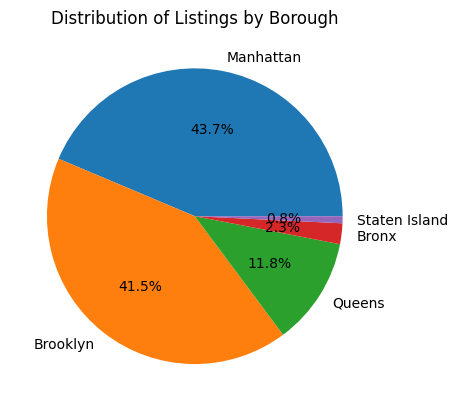

In [95]:
#Pie chart of number of listings by neighbourhood group (borough)
df['neighbourhood_group'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%'
)
plt.title("Distribution of Listings by Borough")
plt.ylabel("")  # remove default ylabel
plt.show()